<a href="https://colab.research.google.com/github/peiying2002/Mini-Project/blob/main/latestdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dataset and Data Preprocessing**

In [1]:
!pip install pycocotools

In [2]:
from pycocotools.coco import COCO

**Load File From Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!wget http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000259556.jpg  
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/00

In [5]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip

--2023-11-10 02:35:46--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.16.111, 52.216.53.33, 3.5.25.18, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.16.111|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  55.6MB/s    in 7.7s    

2023-11-10 02:35:54 (31.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [6]:
dataDir = '/content'

dataType = 'train2017'
annFile = f'{dataDir}/annotations/instances_{dataType}.json'

coco = COCO(annFile)


loading annotations into memory...
Done (t=14.03s)
creating index...
index created!


In [7]:
import os

image_directory = 'train2017'

files = os.listdir(image_directory)

image_files = [file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

num_images = len(image_files)

print(f'Total number of images in the directory: {num_images}')


Total number of images in the directory: 118287


In [8]:
#Test number of images for each categories

from pycocotools.coco import COCO

dataDir = '/content'
dataType = 'train2017'
annFile = f'{dataDir}/annotations/instances_{dataType}.json'

coco = COCO(annFile)

categorized_images = {}

# Go through all images in the dataset
for img_id in coco.getImgIds():
    image_info = coco.loadImgs(img_id)[0]
    # extracts the 'category_id' from each annotation
    image_category_ids = [ann['category_id'] for ann in coco.loadAnns(coco.getAnnIds(imgIds=[img_id]))]
    image_categories = [coco.loadCats(cat_id)[0]['name'] for cat_id in image_category_ids]

    categorized_images[img_id] = {
        'image_name': image_info['file_name'],
        'category_ids': image_category_ids,
        'category_names': image_categories
    }

category_counts = {}

# Iterate through categorized_images and count the occurrences of each category
# Store info into the "category_counts" dic
for img_info in categorized_images.values():
    for category_name in img_info['category_names']:
        if category_name not in category_counts:
            category_counts[category_name] = 1
        else:
            category_counts[category_name] += 1

for category, count in category_counts.items():
    print(f'Category: {category}, Count: {count}')


loading annotations into memory...
Done (t=16.12s)
creating index...
index created!
Category: motorcycle, Count: 8725
Category: person, Count: 262465
Category: bicycle, Count: 7113
Category: knife, Count: 7770
Category: cake, Count: 6353
Category: sink, Count: 5610
Category: cow, Count: 8147
Category: umbrella, Count: 11431
Category: mouse, Count: 2262
Category: keyboard, Count: 2855
Category: tv, Count: 5805
Category: cat, Count: 4768
Category: bottle, Count: 24342
Category: potted plant, Count: 8652
Category: refrigerator, Count: 2637
Category: clock, Count: 6334
Category: spoon, Count: 6165
Category: bowl, Count: 14358
Category: orange, Count: 6399
Category: oven, Count: 3334
Category: handbag, Count: 12354
Category: wine glass, Count: 7913
Category: dining table, Count: 15714
Category: cup, Count: 20650
Category: backpack, Count: 8720
Category: microwave, Count: 1673
Category: book, Count: 24715
Category: toaster, Count: 225
Category: fork, Count: 5479
Category: toilet, Count: 4157

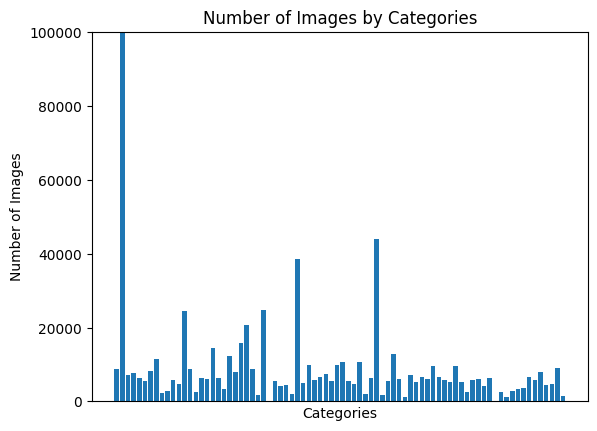

<Figure size 200x200 with 0 Axes>

In [9]:
# Show the class are imbalance

import matplotlib.pyplot as plt

category_names = list(category_counts.keys())
image_counts = list(category_counts.values())

# Create a histogram
plt.bar(category_names, image_counts)
plt.xticks([])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images by Categories')
plt.ylim(0, 100000)
plt.figure(figsize=(2,2))
plt.show()


**Filter the categories:**

In [10]:
from pycocotools.coco import COCO
import os
import shutil
import json

category_names = ["scissors","vase","book","clock","laptop","mouse","keyboard","cell phone","cup","suitcase","person","bottle","chair"]


original_image_dir = "train2017"


original_annotation_file = "annotations/instances_train2017.json"

filtered_image_dir = "filtered_train2017"
os.makedirs(filtered_image_dir, exist_ok=True)


filtered_annotation_file = "filtered_annotations_train2017.json"

coco = COCO(original_annotation_file)

category_ids_to_filter = set(coco.getCatIds(catNms=category_names))

filtered_images = []
filtered_annotations = []

for img_id in coco.getImgIds():
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    filtered_anns = [ann for ann in anns if ann['category_id'] in category_ids_to_filter]

    if filtered_anns:
      # load information about a specific image from the COCO dataset based on its image ID (img_id)
        img_info = coco.loadImgs(img_id)[0]
        img_path = os.path.join(original_image_dir, img_info["file_name"])
        shutil.copy(img_path, os.path.join(filtered_image_dir, img_info["file_name"]))

        filtered_images.append(img_info)
        filtered_annotations.extend(filtered_anns)

filtered_data = {
    "images": filtered_images,
    "annotations": filtered_annotations,
    "categories": [cat for cat in coco.dataset["categories"] if cat['id'] in category_ids_to_filter],
    "info": coco.dataset["info"],
    "licenses": coco.dataset["licenses"]
}

with open(filtered_annotation_file, "w") as outfile:
    json.dump(filtered_data, outfile)

print(f"Filtered images and annotations saved to {filtered_image_dir} and {filtered_annotation_file}.")


loading annotations into memory...
Done (t=13.92s)
creating index...
index created!
Filtered images and annotations saved to filtered_train2017 and filtered_annotations_train2017.json.


In [11]:
import os

filtered_image_dir = "filtered_train2017"

filtered_image_files = os.listdir(filtered_image_dir)

image_files = [file for file in filtered_image_files if not file.startswith('.')]

num_images = len(image_files)

print(f"There are {num_images} images in the 'filtered_train2017' directory.")


There are 81245 images in the 'filtered_train2017' directory.


**Show imbalance**

In [12]:
import os

filtered_annotations_path = '/content/filtered_annotations_train2017.json'  # Adjust the path
with open(filtered_annotations_path, 'r') as f:
    filtered_data = json.load(f)

filtered_annotations = filtered_data['annotations']
filtered_categories = filtered_data['categories']

filtered_images_directory = '/content/filtered_train2017'

category_image_counts = {category['name']: 0 for category in filtered_categories}

for annotation in filtered_annotations:
    category_id = annotation['category_id']
    category_name = next(cat['name'] for cat in filtered_categories if cat['id'] == category_id)
    category_image_counts[category_name] += 1

for category, count in category_image_counts.items():
    print(f"Category: {category}, Number of Images: {count}")


Category: person, Number of Images: 262465
Category: suitcase, Number of Images: 6192
Category: bottle, Number of Images: 24342
Category: cup, Number of Images: 20650
Category: chair, Number of Images: 38491
Category: laptop, Number of Images: 4970
Category: mouse, Number of Images: 2262
Category: keyboard, Number of Images: 2855
Category: cell phone, Number of Images: 6434
Category: book, Number of Images: 24715
Category: clock, Number of Images: 6334
Category: vase, Number of Images: 6613
Category: scissors, Number of Images: 1481


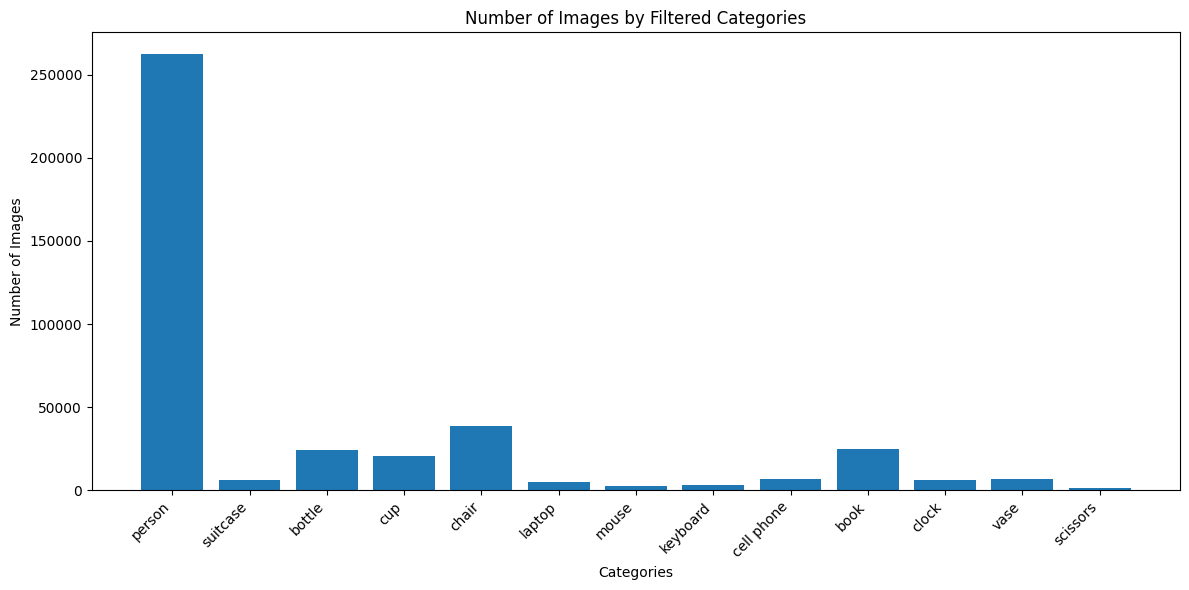

In [13]:
#show the class are still imbalance for filtered_images
import matplotlib.pyplot as plt

category_names = list(category_image_counts.keys())
image_counts = list(category_image_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(category_names, image_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images by Filtered Categories')
plt.tight_layout()
plt.show()


**Another methods**

In [ ]:
from pycocotools.coco import COCO

annFile = 'filtered_annotations_train2017.json'

coco = COCO(annFile)

image_ids = coco.getImgIds()

for image_id in image_ids:
    image_info = coco.loadImgs(image_id)[0]
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    print(f"Image ID: {image_info['id']}")
    print(f"File Name: {image_info['file_name']}")
    print("Annotations:")
    for annotation in annotations:
        print(f"  - Annotation ID: {annotation['id']}")
        print(f"    Category ID: {annotation['category_id']}")
        print(f"    Bounding Box: {annotation['bbox']}")
    print("\n")


In [14]:
# Delete the train2017 file
import shutil

directory_to_delete = "train2017"

if os.path.exists(directory_to_delete) and os.path.isdir(directory_to_delete):
    shutil.rmtree(directory_to_delete)
    print(f"The directory '{directory_to_delete}' and its contents have been deleted.")
else:
    print(f"The directory '{directory_to_delete}' does not exist or is not a directory.")


The directory 'train2017' and its contents have been deleted.


**Save File to Google Drive**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#source_directory = "/content/filtered_train2017"

#destination_directory = "/content/drive/My Drive/Colab Notebooks/images_dataset"

#!cp -r "$source_directory" "$destination_directory"


In [ ]:
#source_directory = "filtered_annotations_train2017.json"

#destination_directory = "/content/drive/My Drive/Colab Notebooks/filtered_annotations"

#!cp -r "$source_directory" "$destination_directory"


**Solve Class Imbalance:**

In [15]:
# Identify the category_id of "person" category

categories = coco.loadCats(coco.getCatIds())

# Display categories line by line
print("Categories:")
for category in categories:
    print(category)

# category_id of "person" category is 1.

Categories:
{'supercategory': 'person', 'id': 1, 'name': 'person'}
{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}
{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}
{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}
{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}
{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}
{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}
{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}
{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}
{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}
{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}
{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}
{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}
{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}
{'supercategory': 'animal', 'id': 16, 'name': 'bird'}
{'supercategory': 'animal', 'id': 17, 'name': 'cat'}
{'supercategory': 'animal', 'id': 18, 'name': 'dog'}
{'supercategory': 'an

In [16]:
# Identify images_id which have same category_id of 1 and need to be removed
from pycocotools.coco import COCO

# Specify the path to your COCO annotation file
annFile = 'filtered_annotations_train2017.json'

# Initialize the COCO object with your annotation file
coco = COCO(annFile)

image_ids = coco.getImgIds()

# Create a list to store image IDs that meet the criteria
images_to_remove = []

for image_id in image_ids:
    image_info = coco.loadImgs(image_id)[0]
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    # Check if all category IDs in the image are 1
    all_category_ids_1 = all(annotation['category_id'] == 1 for annotation in annotations)

    if all_category_ids_1:
        # If all category IDs are 1, add the image ID to the list
        images_to_remove.append(image_id)

print(images_to_remove)


loading annotations into memory...
Done (t=7.48s)
creating index...
index created!
[391895, 522418, 184613, 60623, 483108, 372938, 204805, 384553, 12448, 79841, 515289, 562150, 579003, 462565, 321107, 229643, 455483, 61181, 394892, 1146, 97434, 463836, 122851, 197254, 251252, 37675, 268556, 271177, 559665, 459912, 15827, 175831, 315601, 503707, 369763, 199951, 213687, 108094, 513681, 437370, 289173, 52759, 128939, 150410, 354533, 242139, 334321, 381021, 170629, 6005, 189550, 212663, 450263, 241691, 450500, 232894, 235302, 127474, 38029, 155885, 190056, 236182, 334405, 351053, 157269, 322654, 338948, 518586, 65227, 117125, 426175, 249720, 554348, 231163, 578292, 522778, 365366, 46743, 554114, 437609, 434494, 542510, 54088, 458052, 490081, 571034, 142667, 99734, 350694, 109819, 260141, 7682, 540264, 246809, 102843, 242499, 511204, 30255, 557981, 260166, 529917, 451872, 247306, 420532, 421478, 387173, 289899, 419281, 69946, 77184, 14990, 167854, 32965, 304305, 227227, 122934, 181714, 4295

In [17]:
print(len(images_to_remove))

44458


In [ ]:
for image_id in filtered_images:
  print(image_id)

Streaming output truncated to the last 5000 lines.
{'license': 2, 'file_name': '000000407443.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000407443.jpg', 'height': 640, 'width': 426, 'date_captured': '2013-11-20 07:31:24', 'flickr_url': 'http://farm4.staticflickr.com/3358/3635542750_791097661d_z.jpg', 'id': 407443}
{'license': 2, 'file_name': '000000421218.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000421218.jpg', 'height': 500, 'width': 332, 'date_captured': '2013-11-20 07:33:22', 'flickr_url': 'http://farm4.staticflickr.com/3339/3624221296_7a0cd0c976_z.jpg', 'id': 421218}
{'license': 2, 'file_name': '000000519744.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000519744.jpg', 'height': 640, 'width': 426, 'date_captured': '2013-11-20 07:34:59', 'flickr_url': 'http://farm4.staticflickr.com/3397/3635542312_4bf4919317_z.jpg', 'id': 519744}
{'license': 6, 'file_name': '000000007989.jpg', 'coco_url': 'http://images.cocodataset.org/train2017

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
{'license': 4, 'file_name': '000000459118.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000459118.jpg', 'height': 375, 'width': 500, 'date_captured': '2013-11-24 03:25:55', 'flickr_url': 'http://farm5.staticflickr.com/4064/4364272535_764e398c82_z.jpg', 'id': 459118}
{'license': 4, 'file_name': '000000257461.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000257461.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-24 03:39:09', 'flickr_url': 'http://farm4.staticflickr.com/3356/3518458009_373e6c73f4_z.jpg', 'id': 257461}
{'license': 1, 'file_name': '000000022501.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000022501.jpg', 'height': 375, 'width': 500, 'date_captured': '2013-11-24 04:23:37', 'flickr_url': 'http://farm1.staticflickr.com/162/330125729_07db16c06d_z.jpg', 'id': 22501}
{'license': 3, 'file_name': '000000398895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/00

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'license': 2, 'file_name': '000000453010.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000453010.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-21 19:48:15', 'flickr_url': 'http://farm1.staticflickr.com/1/134035230_c9179c8937_z.jpg', 'id': 453010}
{'license': 1, 'file_name': '000000221216.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000221216.jpg', 'height': 400, 'width': 500, 'date_captured': '2013-11-21 19:58:51', 'flickr_url': 'http://farm1.staticflickr.com/105/301416304_8e33c240bb_z.jpg', 'id': 221216}
{'license': 5, 'file_name': '000000063698.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000063698.jpg', 'height': 411, 'width': 640, 'date_captured': '2013-11-21 20:02:01', 'flickr_url': 'http://farm1.staticflickr.com/147/358588899_5415e7c6fa_z.jpg', 'id': 63698}
{'license': 1, 'file_name': '000000059910.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000059910.jpg', 'height': 375, 'width': 500, 'date_capt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
{'license': 5, 'file_name': '000000499120.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000499120.jpg', 'height': 367, 'width': 640, 'date_captured': '2013-11-14 18:56:22', 'flickr_url': 'http://farm6.staticflickr.com/5298/5505609356_33a6f8af3c_z.jpg', 'id': 499120}
{'license': 4, 'file_name': '000000311337.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000311337.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 19:05:24', 'flickr_url': 'http://farm9.staticflickr.com/8096/8526104532_e6793c6f0d_z.jpg', 'id': 311337}
{'license': 4, 'file_name': '000000494706.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000494706.jpg', 'height': 640, 'width': 425, 'date_captured': '2013-11-14 19:43:09', 'flickr_url': 'http://farm9.staticflickr.com/8046/8408505211_d80272caa9_z.jpg', 'id': 494706}
{'license': 3, 'file_name': '000000052497.jpg', 'coco_url': 'http://images.cocodataset.org/train2017

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
{'license': 3, 'file_name': '000000467081.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000467081.jpg', 'height': 640, 'width': 427, 'date_captured': '2013-11-21 19:35:43', 'flickr_url': 'http://farm7.staticflickr.com/6175/6177942268_26b0040d79_z.jpg', 'id': 467081}
{'license': 3, 'file_name': '000000420349.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000420349.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-21 19:56:23', 'flickr_url': 'http://farm3.staticflickr.com/2182/2322246643_5caf93e91e_z.jpg', 'id': 420349}
{'license': 1, 'file_name': '000000359253.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000359253.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-21 20:03:22', 'flickr_url': 'http://farm4.staticflickr.com/3305/3185549302_707fbafcd2_z.jpg', 'id': 359253}
{'license': 3, 'file_name': '000000098915.jpg', 'coco_url': 'http://images.cocodataset.org/train2017

In [18]:
# Remove the images with all category IDs equal to 1 from the filtered_images
after_filtered_images = [image_info for image_info in filtered_images if image_info['id'] not in images_to_remove]
print(after_filtered_images)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
print(len(after_filtered_images))

36787


In [20]:
value_to_check = 522418

if value_to_check in filtered_images:
    print(f"{value_to_check} is in the filtered_images list.")
else:
    print(f"{value_to_check} is not in the filtered_images list.")


522418 is not in the filtered_images list.


**Update the filtered_train2017**

In [21]:
import os

# Directory where your dataset images are located
dataset_directory = '/content/filtered_train2017'

# Iterate through the images that need to be removed and delete the corresponding image files
for image_id in images_to_remove:
    image_info = next(image_info for image_info in filtered_images if image_info['id'] == image_id)
    file_name = image_info['file_name']
    image_path = os.path.join(dataset_directory, file_name)

    # Check if the image file exists and delete it
    if os.path.exists(image_path):
        os.remove(image_path)
    else:
        print(f"Image file not found: {image_path}")

# Now, you have removed both the image IDs and their corresponding image files


In [22]:
import os

filtered_image_dir = "filtered_train2017"

filtered_image_files = os.listdir(filtered_image_dir)

image_files = [file for file in filtered_image_files if not file.startswith('.')]

num_images = len(image_files)

print(f"There are {num_images} images in the 'filtered_train2017' dataset.")


There are 36787 images in the 'filtered_train2017' dataset.


**Update the filtered_annotations_train2017.json**

In [23]:
import json

# Specify the paths to your annotations files
annotations_file_path = 'filtered_annotations_train2017.json'

# Load the original annotations from the file
with open(annotations_file_path, 'r') as annotations_file:
    original_annotations = json.load(annotations_file)

# Create a list to store the updated annotations
updated_annotations = []

# Define the set of image IDs to remove
image_ids_to_remove = set(images_to_remove)

# Iterate through the original annotations and filter out annotations associated with removed images
for annotation in original_annotations['annotations']:
    if annotation['image_id'] not in image_ids_to_remove:
        updated_annotations.append(annotation)

# Update the annotations in your original annotations data structure
original_annotations['annotations'] = updated_annotations

# Save the updated annotations back to the file
with open(annotations_file_path, 'w') as annotations_file:
    json.dump(original_annotations, annotations_file)

# Your annotations file is now updated without annotations for removed images

In [ ]:
from pycocotools.coco import COCO

annFile = 'filtered_annotations_train2017.json'

coco = COCO(annFile)

image_ids = coco.getImgIds()

for image_id in image_ids:
    image_info = coco.loadImgs(image_id)[0]
    ann_ids = coco.getAnnIds(imgIds=image_id)
    annotations = coco.loadAnns(ann_ids)

    print(f"Image ID: {image_info['id']}")
    print(f"File Name: {image_info['file_name']}")
    print("Annotations:")
    for annotation in annotations:
        print(f"  - Annotation ID: {annotation['id']}")
        print(f"    Category ID: {annotation['category_id']}")
        print(f"    Bounding Box: {annotation['bbox']}")
    print("\n")


Streaming output truncated to the last 5000 lines.
  - Annotation ID: 549400
    Category ID: 1
    Bounding Box: [239.62, 18.12, 59.55, 88.07]
  - Annotation ID: 1137359
    Category ID: 84
    Bounding Box: [372.05, 331.56, 35.55, 43.59]
  - Annotation ID: 1248774
    Category ID: 1
    Bounding Box: [54.03, 36.65, 55.81, 88.61]
  - Annotation ID: 1690483
    Category ID: 1
    Bounding Box: [374.26, 52.9, 35.29, 67.44]
  - Annotation ID: 1695256
    Category ID: 1
    Bounding Box: [414.39, 68.11, 27.94, 65.88]
  - Annotation ID: 1731647
    Category ID: 1
    Bounding Box: [30.33, 48.53, 22.41, 67.93]
  - Annotation ID: 1739168
    Category ID: 1
    Bounding Box: [54.05, 62.95, 69.92, 276.63]
  - Annotation ID: 2028554
    Category ID: 1
    Bounding Box: [300.44, 57.5, 133.66, 421.06]
  - Annotation ID: 2028646
    Category ID: 1
    Bounding Box: [277.24, 20.6, 65.31, 126.72]


Image ID: 504069
File Name: 000000504069.jpg
Annotations:
  - Annotation ID: 1668733
    Category ID: 

In [24]:
# Check image_id that should be removed are not in the filtered_annotations_train2017.json

from pycocotools.coco import COCO

# Specify the path to your COCO annotation file
annFile = 'filtered_annotations_train2017.json'

# Initialize the COCO object with your annotation file
coco = COCO(annFile)

# Define the image ID you want to check
image_id_to_check = 204805

# Iterate through the annotations and check if the image ID is present
for annotation in coco.dataset['annotations']:
    if annotation['image_id'] == image_id_to_check:
        print(f"Image ID {image_id_to_check} is in the filtered_annotations file.")
        break
    else:
      print(f"Image ID {image_id_to_check} is not in the filtered_annotations file.")
      break

loading annotations into memory...
Done (t=2.05s)
creating index...
index created!
Image ID 204805 is not in the filtered_annotations file.


In [25]:
import os

filtered_annotations_path = '/content/filtered_annotations_train2017.json'  # Adjust the path
with open(filtered_annotations_path, 'r') as f:
    filtered_data = json.load(f)

filtered_annotations = filtered_data['annotations']
filtered_categories = filtered_data['categories']

filtered_images_directory = '/content/filtered_train2017'

updated_category_image_counts = {category['name']: 0 for category in filtered_categories}

for annotation in filtered_annotations:
    category_id = annotation['category_id']
    category_name = next(cat['name'] for cat in filtered_categories if cat['id'] == category_id)
    updated_category_image_counts[category_name] += 1

for category, count in updated_category_image_counts.items():
    print(f"Category: {category}, Number of Images: {count}")


Category: person, Number of Images: 83948
Category: suitcase, Number of Images: 6192
Category: bottle, Number of Images: 24342
Category: cup, Number of Images: 20650
Category: chair, Number of Images: 38491
Category: laptop, Number of Images: 4970
Category: mouse, Number of Images: 2262
Category: keyboard, Number of Images: 2855
Category: cell phone, Number of Images: 6434
Category: book, Number of Images: 24715
Category: clock, Number of Images: 6334
Category: vase, Number of Images: 6613
Category: scissors, Number of Images: 1481


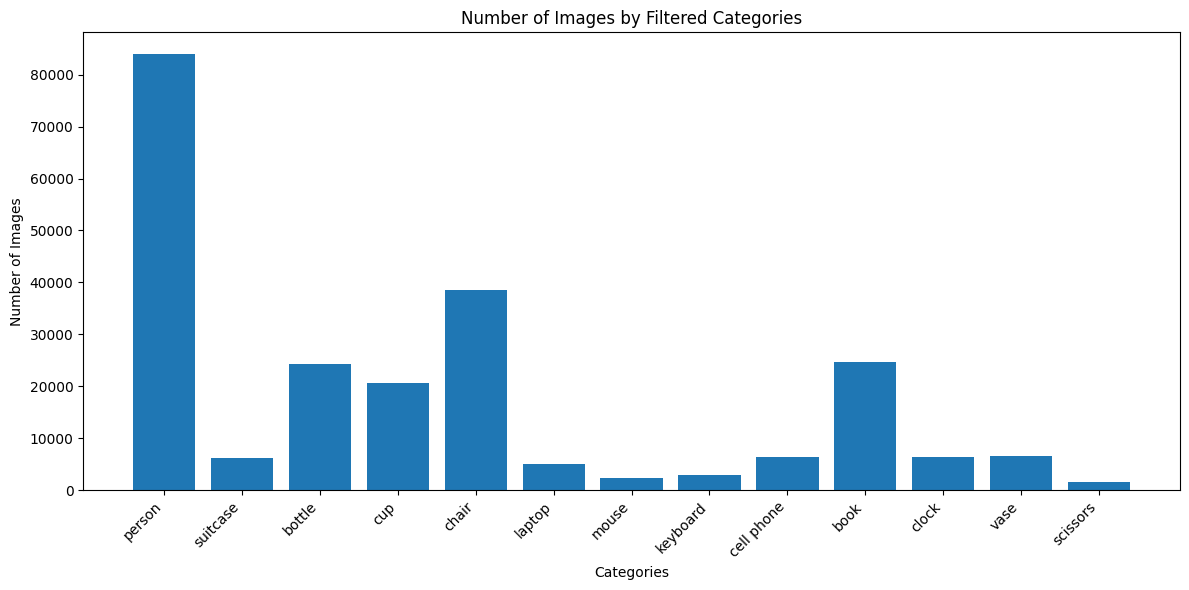

In [26]:
#show the class are still imbalance for filtered_images
import matplotlib.pyplot as plt

category_names = list(updated_category_image_counts.keys())
image_counts = list(updated_category_image_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(category_names, image_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images by Filtered Categories')
plt.tight_layout()
plt.show()

**Again**

In [27]:
# Because the number belongs to the person categories are still high, then remove the image where annotation has only category_id of 1(person) and 62(chair)
# Load the updated annotations from the file
with open(annotations_file_path, 'r') as updated_annotations_file:
    updated_annotations = json.load(updated_annotations_file)

# Create a dictionary to store image IDs and their associated category IDs
image_category_mapping = {}

# Iterate through the updated annotations to build the image_category_mapping
for annotation in updated_annotations['annotations']:
    image_id = annotation['image_id']
    category_id = annotation['category_id']

    if image_id not in image_category_mapping:
        image_category_mapping[image_id] = set()

    image_category_mapping[image_id].add(category_id)

# Create a list to store image IDs that have only category IDs 1 and 62
images_with_only_categories_1_and_62 = []

# Iterate through the image_category_mapping and identify images with only categories 1 and 62
for image_id, category_ids in image_category_mapping.items():
    if category_ids == {1, 62}:
        images_with_only_categories_1_and_62.append(image_id)

print(images_with_only_categories_1_and_62)


[293802, 350341, 369826, 291380, 440646, 579815, 42069, 511136, 385861, 303590, 66412, 570579, 17707, 53990, 190081, 57387, 448269, 569768, 384012, 377715, 240727, 560323, 480726, 365289, 14941, 90255, 235788, 382848, 378334, 29886, 365928, 437049, 82826, 560598, 519055, 329258, 545390, 516913, 155125, 1626, 355179, 237464, 86738, 542681, 416489, 306335, 159842, 260247, 435937, 486521, 1180, 445944, 261050, 256630, 395402, 154816, 51223, 228580, 469982, 99481, 3001, 452866, 363577, 113722, 267251, 216303, 97048, 441701, 333440, 203102, 573647, 221172, 4092, 207275, 24601, 431067, 87327, 532216, 372384, 246014, 223414, 150235, 277174, 367578, 550051, 421889, 11300, 224358, 107781, 37624, 572081, 466882, 196483, 483135, 52691, 155478, 499095, 249715, 198234, 284099, 218119, 251367, 124712, 194790, 360182, 185807, 221547, 545363, 435562, 294124, 323576, 181139, 21971, 40497, 259345, 350463, 151826, 51920, 434930, 523097, 105234, 177990, 60992, 487630, 126229, 67966, 409784, 412798, 10123,

In [28]:
#check

if 255326 in images_with_only_categories_1_and_62:
    print("Image ID 255326 is in the list.")
else:
    print("Image ID 255326 is not in the list.")


Image ID 255326 is in the list.


In [29]:
import os

# Directory where your dataset images are located
dataset_directory = '/content/filtered_train2017'

# Iterate through the images that need to be removed and delete the corresponding image files
for image_id in images_with_only_categories_1_and_62:
    image_info = next(image_info for image_info in filtered_images if image_info['id'] == image_id)
    file_name = image_info['file_name']
    image_path = os.path.join(dataset_directory, file_name)

    # Check if the image file exists and delete it
    if os.path.exists(image_path):
        os.remove(image_path)
    else:
        print(f"Image file not found: {image_path}")

# Now, you have removed both the image IDs and their corresponding image files

In [30]:
import os

filtered_image_dir = "filtered_train2017"

filtered_image_files = os.listdir(filtered_image_dir)

image_files = [file for file in filtered_image_files if not file.startswith('.')]

num_images = len(image_files)

print(f"There are {num_images} images in the 'filtered_train2017' dataset.")

There are 33101 images in the 'filtered_train2017' dataset.


In [31]:
import json

# Specify the paths to your annotations files
annotations_file_path = 'filtered_annotations_train2017.json'

# Load the original annotations from the file
with open(annotations_file_path, 'r') as annotations_file:
    original_annotations = json.load(annotations_file)

# Create a list to store the updated annotations
updated_annotations = []

# Define the set of image IDs to remove
image_ids_to_remove = set(images_with_only_categories_1_and_62)

# Iterate through the original annotations and filter out annotations associated with removed images
for annotation in original_annotations['annotations']:
    if annotation['image_id'] not in image_ids_to_remove:
        updated_annotations.append(annotation)

# Update the annotations in your original annotations data structure
original_annotations['annotations'] = updated_annotations

# Save the updated annotations back to the file
with open(annotations_file_path, 'w') as annotations_file:
    json.dump(original_annotations, annotations_file)

# Your annotations file is now updated without annotations for removed images

In [32]:
import json

filtered_annotations_path = 'filtered_annotations_train2017.json'  # Adjust the path
with open(filtered_annotations_path, 'r') as f:
    filtered_data = json.load(f)

filtered_annotations = filtered_data['annotations']
filtered_categories = filtered_data['categories']

filtered_images_directory = '/content/filtered_train2017'

updated_category_image_counts = {category['name']: 0 for category in filtered_categories}

# Create a set of image IDs that are still present after filtering
remaining_image_ids = set(annotation['image_id'] for annotation in filtered_annotations)

for annotation in filtered_annotations:
    image_id = annotation['image_id']
    category_id = annotation['category_id']
    category_name = next(cat['name'] for cat in filtered_categories if cat['id'] == category_id)
    updated_category_image_counts[category_name] += 1

# Print the updated counts
for category, count in updated_category_image_counts.items():
    print(f"Category: {category}, Number of Images: {count}")

# Print the number of remaining images after filtering
print(f"Number of remaining images after filtering: {len(remaining_image_ids)}")


Category: person, Number of Images: 61765
Category: suitcase, Number of Images: 6192
Category: bottle, Number of Images: 24342
Category: cup, Number of Images: 20650
Category: chair, Number of Images: 24725
Category: laptop, Number of Images: 4970
Category: mouse, Number of Images: 2262
Category: keyboard, Number of Images: 2855
Category: cell phone, Number of Images: 6434
Category: book, Number of Images: 24715
Category: clock, Number of Images: 6334
Category: vase, Number of Images: 6613
Category: scissors, Number of Images: 1481
Number of remaining images after filtering: 33101


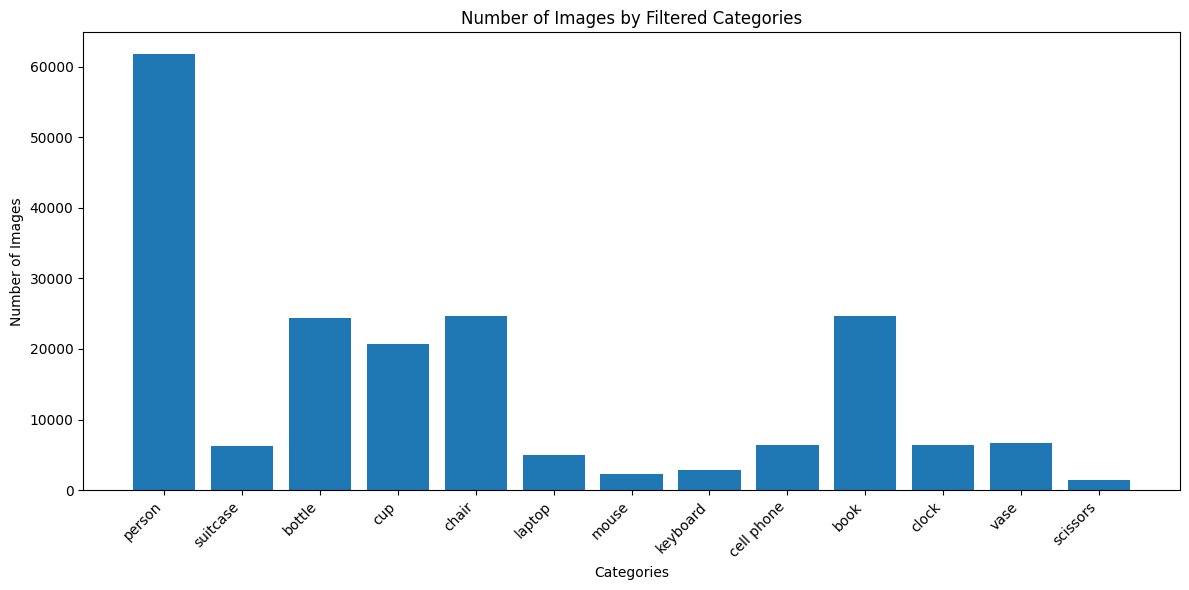

In [33]:
#show the class are balance for filtered_images
import matplotlib.pyplot as plt

category_names = list(updated_category_image_counts.keys())
image_counts = list(updated_category_image_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(category_names, image_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images by Filtered Categories')
plt.tight_layout()
plt.show()

In [ ]:
source_directory = "/content/filtered_train2017"

destination_directory = "/content/drive/My Drive/Colab Notebooks/updated_dataset"

!cp -r "$source_directory" "$destination_directory"


Streaming output truncated to the last 5000 lines.
cp: cannot create regular file '/content/drive/My Drive/Colab Notebooks/updated_dataset/downloads/extracted/ZIP.images.cocodataset.org_zips_test2017x5CMPJ-Uui8zQOu-7FjCXba-h3TxjWjC8V0ONp2Vuro.zip/test2017/000000541512.jpg': No such file or directory
cp: cannot create regular file '/content/drive/My Drive/Colab Notebooks/updated_dataset/downloads/extracted/ZIP.images.cocodataset.org_zips_test2017x5CMPJ-Uui8zQOu-7FjCXba-h3TxjWjC8V0ONp2Vuro.zip/test2017/000000395525.jpg': No such file or directory
cp: cannot create regular file '/content/drive/My Drive/Colab Notebooks/updated_dataset/downloads/extracted/ZIP.images.cocodataset.org_zips_test2017x5CMPJ-Uui8zQOu-7FjCXba-h3TxjWjC8V0ONp2Vuro.zip/test2017/000000235435.jpg': No such file or directory
cp: cannot create regular file '/content/drive/My Drive/Colab Notebooks/updated_dataset/downloads/extracted/ZIP.images.cocodataset.org_zips_test2017x5CMPJ-Uui8zQOu-7FjCXba-h3TxjWjC8V0ONp2Vuro.zip/tes

In [ ]:
source_directory = "filtered_annotations_train2017.json"

destination_directory = "/content/drive/My Drive/Colab Notebooks/updated_annotations"

!cp -r "$source_directory" "$destination_directory"


cp: cannot create regular file '/content/drive/My Drive/Colab Notebooks/filtered_annotations': No such file or directory


**Model Training**

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds

In [ ]:
(train_data, validation_data), info = tfds.load(
    'coco/2017', split=['train[:90%]', 'train[90%:]'], with_info=True, data_dir='/content/filtered_train2017'
)

OSError: ignored

In [ ]:
IMAGE_SIZE = (224, 224) #input of shape (224, 224, 3) for mobilenet model
BATCH_SIZE = 32

In [ ]:
def preprocess_image(example):
    image = example['image']
    label = example['objects']['label']
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.keras.applications.mobilenet.preprocess_input(image)
    return image, label

In [ ]:
train_data = train_data.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
validation_data = validation_data.map(preprocess_image).batch(BATCH_SIZE)

In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)

In [ ]:
loc = Dense(4, activation='sigmoid')(x)  # 4 for (xmin, ymin, xmax, ymax) of bounding boxes
conf = Dense(info.features['objects']['label'].num_classes, activation='softmax')(x)

In [ ]:
predictions = tf.keras.layers.Concatenate()([loc, conf])

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Fine-tune the layers
for layer in base_model.layers[:100]:  # Adjust the number of layers to freeze
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(train_data, epochs=epochs, validation_data=validation_data)